## This notebook will be used to briefly analyze features for the various markers.

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pca import pca

In [241]:
# First, import data.
feature_dir = "/Users/agreic/Desktop/testing_dir/fit_output/"
# In the feature_dir, there are directories for each marker. Those have the scaled features used for training in the logreg subdir,
# One csv for 2D and one for 3D. The labels are saved with the same filename with _labels appended.

# Get the list of markers
markers = os.listdir(feature_dir)
markers = [x for x in markers if not x.startswith(".")]

big_csv_2d = pd.DataFrame()
big_csv_3d = pd.DataFrame()

# For each marker, load the features and labels
for marker in markers:
    print("Processing marker: ", marker)

    # Load the labels and features
    features_2D_path = os.path.join(feature_dir, marker, "logreg", "2d", "train_2D.csv")
    features_3D_path = os.path.join(feature_dir, marker, "logreg", "3d", "train_3D.csv")
    labels_2D_path = os.path.join(feature_dir, marker, "logreg", "2d", "train_2D_labels.csv")
    labels_3D_path = os.path.join(feature_dir, marker, "logreg", "3d", "train_3D_labels.csv")

    features_2D = pd.read_csv(features_2D_path, index_col=0, header=0)
    features_3D = pd.read_csv(features_3D_path, index_col=0, header=0)
    labels_2D = pd.read_csv(labels_2D_path, index_col=0, header=0)
    labels_3D = pd.read_csv(labels_3D_path, index_col=0, header=0)

    # Combine the features and labels
    features_2D["label"] = labels_2D["label"]
    features_3D["label"] = labels_3D["label"]

    # Add dimension and marker columns
    features_2D["dim"] = "2D"
    features_2D["marker"] = marker
    features_3D["dim"] = "3D"
    features_3D["marker"] = marker

    # Concatenate to the big csv
    big_csv_2d = pd.concat([big_csv_2d, features_2D])
    big_csv_3d = pd.concat([big_csv_3d, features_3D])

print(big_csv_2d.shape)
print(big_csv_3d.shape)

print(big_csv_3d)

Processing marker:  PU1
Processing marker:  SCA1
Processing marker:  GATA1
Processing marker:  CD41
(9606, 132)
(9606, 406)
          area  area_bbox  area_convex  area_filled  axis_major_length  \
0    -0.152281  -0.095150    -0.126149    -0.152281          -0.313288   
1    -0.128573  -0.055280    -0.097783    -0.128573           0.239744   
2    -0.064255  -0.062614    -0.071070    -0.064255          -0.200898   
3    -0.159201  -0.082745    -0.119471    -0.159201          -0.165464   
4    -0.114167  -0.076216    -0.089387    -0.114167          -0.103604   
...        ...        ...          ...          ...                ...   
2134  1.765235   1.505629     1.659963     1.765235           2.537543   
2135  1.014556   1.238711     0.989189     1.014555           2.008565   
2136  2.977971   2.429167     2.723432     2.977971           3.539949   
2137  1.492659   1.057046     1.329983     1.492659           2.242226   
2138  1.478044   1.112822     1.316733     1.478043           

In [242]:
# Figure size standartization
fig_width = 6.5
fig_height = 6.5 * 9 / 16

fontsize= 11
linewidth = 1
font_size = fontsize

In [243]:
# Color maker:
from matplotlib.colors import to_rgb, to_hex
import itertools

# Starting palette with distinct colors for single markers
# palette = {
#     "PU1": "#1f77b4",   # muted blue
#     "SCA1": "#ff7f0e",  # muted orange
#     "GATA1": "#2ca02c", # muted green
#     "CD41": "#d62728",   # muted red
#     "None": "white"      # white for no markers
# }

palette = {
    "PU1": "#008b8b",       # dark cyan
    "SCA1": "#00008b",      # dark green
    "GATA1": "#006400",     # dark blue
    "CD41": "#ff1493",      # dark pink
    "None": "#ffffff"       # white for no markers
}



# Function to calculate combined color
def mix_colors(markers):
    # Get the RGB colors of each marker
    rgb_colors = [to_rgb(palette[marker]) for marker in markers]
    # Calculate the average RGB values
    avg_rgb = tuple(sum(col) / len(markers) for col in zip(*rgb_colors))
    # Convert the average RGB back to hex
    return to_hex(avg_rgb)

# Generate colors for all unique combinations of the markers with all permutations
combined_palette = {}
for r in range(1, len(palette) + 1):
    for combo in itertools.combinations(palette.keys(), r):
        # Calculate the mixed color for the combination
        color = mix_colors(combo)
        # Create an entry for each permutation of the combination
        for perm in itertools.permutations(combo):
            combo_name = ", ".join(perm)
            combined_palette[combo_name] = color

# Display the final combined_palette dictionary
combined_palette


{'PU1': '#008b8b',
 'SCA1': '#00008b',
 'GATA1': '#006400',
 'CD41': '#ff1493',
 'None': '#ffffff',
 'PU1, SCA1': '#00468b',
 'SCA1, PU1': '#00468b',
 'PU1, GATA1': '#007846',
 'GATA1, PU1': '#007846',
 'PU1, CD41': '#80508f',
 'CD41, PU1': '#80508f',
 'PU1, None': '#80c5c5',
 'None, PU1': '#80c5c5',
 'SCA1, GATA1': '#003246',
 'GATA1, SCA1': '#003246',
 'SCA1, CD41': '#800a8f',
 'CD41, SCA1': '#800a8f',
 'SCA1, None': '#8080c5',
 'None, SCA1': '#8080c5',
 'GATA1, CD41': '#803c4a',
 'CD41, GATA1': '#803c4a',
 'GATA1, None': '#80b280',
 'None, GATA1': '#80b280',
 'CD41, None': '#ff8ac9',
 'None, CD41': '#ff8ac9',
 'PU1, SCA1, GATA1': '#00505d',
 'PU1, GATA1, SCA1': '#00505d',
 'SCA1, PU1, GATA1': '#00505d',
 'SCA1, GATA1, PU1': '#00505d',
 'GATA1, PU1, SCA1': '#00505d',
 'GATA1, SCA1, PU1': '#00505d',
 'PU1, SCA1, CD41': '#55358e',
 'PU1, CD41, SCA1': '#55358e',
 'SCA1, PU1, CD41': '#55358e',
 'SCA1, CD41, PU1': '#55358e',
 'CD41, PU1, SCA1': '#55358e',
 'CD41, SCA1, PU1': '#55358e',
 '

In [244]:
# print(big_csv_3d['marker'].unique())

df3 = big_csv_3d[big_csv_3d['marker'] == 'CD41'].copy()
# Create an ID column
df3['ID'] = df3.index
print(df3['dim'].unique())
df3.drop(columns=['dim'], inplace=True)

df_pivot3 = df3.pivot_table(index='ID', columns='marker', values='label', aggfunc='max', fill_value=0)#.reset_index()
# Add ALL other columns
df_pivot3 = df_pivot3.merge(df3.drop(columns=['label', 'marker']), on='ID', how='left')

df_pivot3['combined_marker_status'] = df_pivot3.apply(
    lambda row: ', '.join([marker for marker in df3['marker'].unique() if row.get(marker, 0) == 1]),
    axis=1
)

df_pivot3['combined_marker_status'] = df_pivot3['combined_marker_status'].apply(lambda x: 'None' if x == '' else x)

# Print any NaN values
# print(df_pivot3.columns[df_pivot3.isna().any()].tolist())
# Remove the columns with NaN values
df_pivot3.dropna(axis=1, inplace=True)

# print(df_pivot3 ,df3.shape)

['3D']


In [245]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Replace big_csv_3d with your actual DataFrame
df = big_csv_3d[big_csv_3d['marker'] != 'CD41'].copy()
df2 = big_csv_2d[big_csv_2d['marker'] != 'CD41'].copy()

# df = big_csv_3d.copy()
# df2 = big_csv_2d.copy()

# Drop feret_diameter_max column
df = df.drop(columns=['feret_diameter_max'])
df2 = df2.drop(columns=['feret_diameter_max'])

# df3 = big_csv_3d[big_csv_3d['marker'] == 'CD41'].copy()
df4 = big_csv_2d[big_csv_2d['marker'] == 'CD41'].copy()

# Drop the dim column
df.drop(columns=['dim'], inplace=True)
df2.drop(columns=['dim'], inplace=True)
# df3.drop(columns=['dim'], inplace=True)
df4.drop(columns=['dim'], inplace=True)

# Step 1: Pivot table to create one row per cell with markers as columns
# Use all columns except 'label' and 'marker' as the index for each unique cell
index_columns = list(set(df.columns) - {'label', 'marker'})
index_columns2 = list(set(df2.columns) - {'label', 'marker'})
# index_columns3 = list(set(df3.columns) - {'label', 'marker'})
index_columns4 = list(set(df4.columns) - {'label', 'marker'})

df_pivot = df.pivot_table(index=index_columns, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()
df_pivot2 = df2.pivot_table(index=index_columns2, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()
# df_pivot3 = df3.pivot_table(index=index_columns3, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()
df_pivot4 = df4.pivot_table(index=index_columns4, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()

# Step 2: Create a combined marker status label for each cell
df_pivot['combined_marker_status'] = df_pivot.apply(
    lambda row: ', '.join([marker for marker in df['marker'].unique() if row.get(marker, 0) == 1]),
    axis=1
)
df_pivot2['combined_marker_status'] = df_pivot2.apply(
    lambda row: ', '.join([marker for marker in df2['marker'].unique() if row.get(marker, 0) == 1]),
    axis=1
)
# df_pivot3['combined_marker_status'] = df_pivot3.apply(
#     lambda row: ', '.join([marker for marker in df3['marker'].unique() if row.get(marker, 0) == 1]),
#     axis=1
# )
df_pivot4['combined_marker_status'] = df_pivot4.apply(
    lambda row: ', '.join([marker for marker in df4['marker'].unique() if row.get(marker, 0) == 1]),
    axis=1
)

# Create a 'Negative' label for cells with no markers
df_pivot['combined_marker_status'] = df_pivot['combined_marker_status'].apply(lambda x: 'None' if x == '' else x)
df_pivot2['combined_marker_status'] = df_pivot2['combined_marker_status'].apply(lambda x: 'None' if x == '' else x)
# df_pivot3['combined_marker_status'] = df_pivot3['combined_marker_status'].apply(lambda x: 'None' if x == '' else x)
df_pivot4['combined_marker_status'] = df_pivot4['combined_marker_status'].apply(lambda x: 'None' if x == '' else x)

# Step 3: Prepare data for PCA
# Select only feature columns for PCA input
feature_columns = [col for col in df_pivot.columns if not col.startswith('marker') and col != 'combined_marker_status' and col != 'label']
feature_columns2 = [col for col in df_pivot2.columns if not col.startswith('marker') and col != 'combined_marker_status' and col != 'label']
feature_columns3 = [col for col in df_pivot3.columns if not col.startswith('marker') and col != 'combined_marker_status' and col != 'label']
feature_columns4 = [col for col in df_pivot4.columns if not col.startswith('marker') and col != 'combined_marker_status' and col != 'label']
features = df_pivot[feature_columns]
features2= df_pivot2[feature_columns2]
features3= df_pivot3[feature_columns3]
features4= df_pivot4[feature_columns4]

# Step 4: Use PCA and color by combined_marker_status
pca = PCA(n_components=2)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=2)
pca4 = PCA(n_components=2)
pca_results = pca.fit_transform(features)
pca_results2 = pca2.fit_transform(features2)
pca_results3 = pca3.fit_transform(features3)
pca_results4 = pca4.fit_transform(features4)

# Add PCA results and labels to the DataFrame
df_pivot['PCA1'] = pca_results[:, 0]
df_pivot['PCA2'] = pca_results[:, 1]
df_pivot2['PCA1'] = pca_results2[:, 0]
df_pivot2['PCA2'] = pca_results2[:, 1]
df_pivot3['PCA1'] = pca_results3[:, 0]
df_pivot4['PCA1'] = pca_results4[:, 0]
df_pivot3['PCA2'] = pca_results3[:, 1]
df_pivot4['PCA2'] = pca_results4[:, 1]

# # Plot
# plt.figure(figsize=(fig_width, fig_height))
# sns.scatterplot(data=df_pivot, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100)
# lims = [-2,2]

# plt.ylim(lims)
# plt.xlim(lims)
# plt.legend([],[], frameon=False)
# plt.show()

# # Plot
# plt.figure(figsize=(fig_width, fig_height))
# sns.scatterplot(data=df_pivot, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100)
# plt.show()

# plt.figure(figsize=(fig_width, fig_height))
# sns.scatterplot(data=df_pivot2, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100)
# plt.show()


/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/1246797140.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot = df.pivot_table(index=index_columns, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/1246797140.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot = df.pivot_table(index=index_columns, columns='marker', values='label', aggfunc='max', fill_value=0).reset_index()
/var/folders/33/8fj_gn7d4wj3r7

In [246]:
_3D_all = df_pivot.copy()
_2D_all = df_pivot2.copy()
_3D_CD41 = df_pivot3.copy()
_2D_CD41 = df_pivot4.copy()

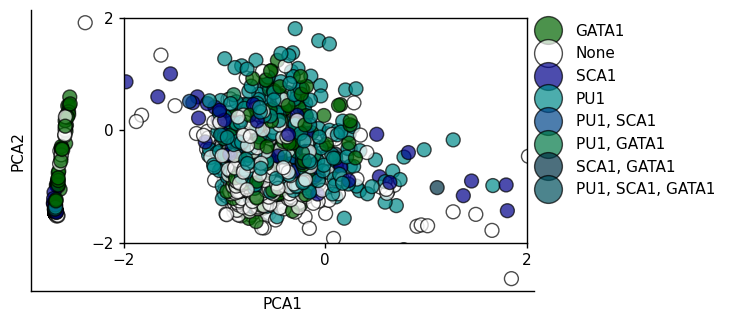

In [247]:
########## ZOOMED IN PLOT ##########
# Import necessary functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main plot
plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100, alpha=0.7, edgecolor='black', linewidth=1)
plt.title('')
# plt.legend(loc='upper right', title='')
# Remove legend
plt.legend([], [], frameon=False)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Keep only 3 ticks on each axis
plt.gca().set_xticks([0, 800])
plt.gca().set_yticks([-40, 0, 80])
# Remove ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])
# Remove labels
# plt.gca().set_xlabel('')
# plt.gca().set_ylabel('')


# Create an inset for zooming in on a specific area
axins = inset_axes(plt.gca(), width='80%', height='80%', loc='upper right')  # Adjust size and location
sns.scatterplot(data=df_pivot, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100, ax=axins, alpha=0.7, edgecolor='black', linewidth=1)
# Define the limits for the zoomed area
lims = [-2, 2]
# Set limits for the inset
axins.set_xlim(lims)  # Adjust these limits as needed
axins.set_ylim(lims)  # Adjust these limits as needed

# Optionally remove the legend from the inset plot
axins.legend([], [], frameon=False)
# Remove axis names, ticks, and labels
axins.set_xticks([-2, 0, 2])
axins.set_yticks([-2, 0, 2])
# axins.set_xticks([])
# axins.set_yticks([])

axins.set_xlabel('')
axins.set_ylabel('')

# Move the legend outside the plot
plt.legend(title='', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=fontsize, markerscale=2)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Draw lines from the inset to the main plot
# mark_inset(plt.gca(), axins, loc1=1, loc2=3, fc="none", ec='black', lw=5)

# Show the plots
plt.show()

In [248]:
df_pivot3.head()

ID  CD41      area  area_bbox  area_convex  area_filled  axis_major_length  \
0   0     0  0.032891   0.153559     0.057294     0.032891           1.002651   
1   1     0 -0.155418  -0.162958    -0.160473    -0.155418           0.272113   
2   2     0 -0.024356  -0.031552    -0.022138    -0.024356           1.076791   
3   3     0 -0.152903  -0.164815    -0.161400    -0.152903          -0.153972   
4   4     0 -0.171118  -0.119537    -0.145232    -0.171118           0.319832   

   axis_minor_length  equivalent_diameter_area  euler_number  ...  \
0           0.223347                  0.563489       0.03297  ...   
1          -0.149073                  0.052207       0.03297  ...   
2          -0.448372                  0.426706       0.03297  ...   
3           0.214509                  0.060487       0.03297  ...   
4           0.122955                 -0.000748       0.03297  ...   

   moments_weighted_normalized-3-2-3  moments_weighted_normalized-3-3-0  \
0                          -0.395857                           0.410423   
1                          -0.064593                          -0.017118   
2                           0.171669                          -1.527976   
3                          -0.048126                          -0.022552   
4                          -0.144207                          -0.454350   

   moments_weighted_normalized-3-3-1  moments_weighted_normalized-3-3-2  \
0                          -0.402051                           0.210641   
1                          -0.051611                           0.000906   
2                          -0.768089                          -0.885156   
3                           0.007259                          -0.007758   
4                           0.142540                          -0.180461   

   moments_weighted_normalized-3-3-3  num_pixels  solidity  \
0                          -0.027405    0.032891 -1.490805   
1                           0.013540   -0.155418  0.346489   
2                          -0.301876   -0.024356 -0.546525   
3                           0.026023   -0.152903  0.604051   
4                           0.089279   -0.171118 -1.860174   

   combined_marker_status         PCA1      PCA2  
0                    None -1069.003587  1.322606  
1                    None -1068.002256  0.403786  
2                    None -1066.988850  0.442961  
3                    None -1066.008396  0.488847  
4                    None -1065.003324  0.308393  

[5 rows x 407 columns]

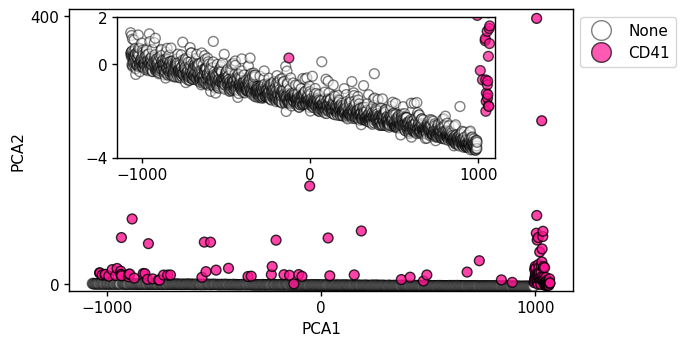

In [276]:
########## ZOOMED IN PLOT ########## CD41
# Import necessary functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main plot
plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot3[df_pivot3['combined_marker_status'] == 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, alpha=0.2, edgecolor='black', linewidth=1)
sns.scatterplot(data=df_pivot3[df_pivot3['combined_marker_status'] != 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, alpha=.8, edgecolor='black', linewidth=1)
plt.title('')
# plt.legend(loc='upper right', title='')
# Remove legend
plt.legend([], [], frameon=False)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)


# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# # Keep only 3 ticks on each axis
plt.gca().set_xticks([-1000, 0, 1000])
plt.gca().set_yticks([0, 400])

# Show the plots
plt.ylim(-10,410)

# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
# Remov elabel
# plt.gca().set_xlabel('')
# plt.gca().set_ylabel('')

# Remove legend
# plt.legend([], [], frameon=False)

# Create an inset for zooming in on a specific area
axins = inset_axes(plt.gca(), width='75%', height='50%', loc='upper left', bbox_to_anchor=(0.08, 0, 1, 1), bbox_transform=plt.gca().transAxes)  # Adjust size and location
sns.scatterplot(data=df_pivot3[df_pivot3['combined_marker_status'] == 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, ax=axins, alpha=0.5, edgecolor='black', linewidth=1)
sns.scatterplot(data=df_pivot3[df_pivot3['combined_marker_status'] != 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, ax=axins, alpha=.7, edgecolor='black', linewidth=1)

# # Define the limits for the zoomed area
lims = [-4, 2]
# lims = [-2, 2]
# # Set limits for the inset
axins.set_xlim(-1150,1100)  # Adjust these limits as needed
axins.set_ylim(lims)  # Adjust these limits as needed
# axins.set_xlim([-4.1,5])

# Optionally remove the legend from the inset plot
axins.legend([], [], frameon=False)
# Remove axis names, ticks, and labels
axins.set_xticks([-1000, 0, 1000])
axins.set_yticks([-4, 0, 2])
# axins.set_xticks([])
# axins.set_yticks([])
axins.set_xlabel('')
axins.set_ylabel('')

# Move the legend outside the plot

# Set font size for all elements
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Draw lines from the inset to the main plot
# mark_inset(plt.gca(), axins, loc1=1, loc2=3, fc="none", ec='black', lw=5)
plt.legend(title='', bbox_to_anchor=(1.48, 1), loc='upper right', borderaxespad=0., frameon=True, fontsize=fontsize, markerscale=2)

plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/cd41_PCA_3d.svg')  # Saves as SVG format
plt.show()




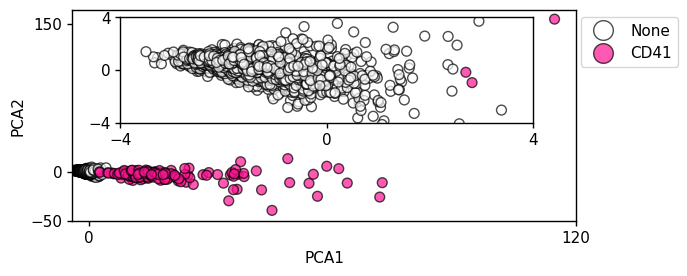

In [270]:
########## ZOOMED IN PLOT ########## CD41
# Import necessary functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main plot
plt.figure(figsize=(fig_width, fig_height*0.75))
sns.scatterplot(data=df_pivot4[df_pivot4['combined_marker_status'] == 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1)
sns.scatterplot(data=df_pivot4[df_pivot4['combined_marker_status'] != 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1)
plt.title('')
# plt.legend(loc='upper right', title='')
# Remove legend
# plt.legend([], [], frameon=False)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# # Keep only 3 ticks on each axis
plt.gca().set_xticks([0, 120])
plt.gca().set_yticks([-50, 0, 150])

plt.xlim(-4, 120)

# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
# Remov elabel
# plt.gca().set_xlabel('')
# plt.gca().set_ylabel('')

# Remove legend
plt.legend([], [], frameon=False)

# Create an inset for zooming in on a specific area
axins = inset_axes(plt.gca(), width='82%', height='50%', loc='upper left', bbox_to_anchor=(0.08, 0, 1, 1), bbox_transform=plt.gca().transAxes)  # Adjust size and location
sns.scatterplot(data=df_pivot4[df_pivot4['combined_marker_status'] == 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, ax=axins, alpha=0.7, edgecolor='black', linewidth=1)
sns.scatterplot(data=df_pivot4[df_pivot4['combined_marker_status'] != 'None'], x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=50, ax=axins, alpha=0.7, edgecolor='black', linewidth=1)

# # Define the limits for the zoomed area
# lims = [-4, 2.5]
lims = [-2, 2]
# # Set limits for the inset
# axins.set_xlim(-1100,1100)  # Adjust these limits as needed
axins.set_ylim(lims)  # Adjust these limits as needed
axins.set_xlim([-4,4])

# Optionally remove the legend from the inset plot
axins.legend([], [], frameon=False)
# Remove axis names, ticks, and labels
axins.set_xticks([-4, 0, 4])
axins.set_yticks([-4, 0, 4])
# axins.set_xticks([])
# axins.set_yticks([])
axins.set_xlabel('')
axins.set_ylabel('')


# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Draw lines from the inset to the main plot
# mark_inset(plt.gca(), axins, loc1=1, loc2=3, fc="none", ec='black', lw=5)
plt.legend(title='', bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0., frameon=True, fontsize=fontsize, markerscale=2)

# Show the plots
plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/cd41_PCA_2d.svg')  # Saves as SVG format
plt.show()


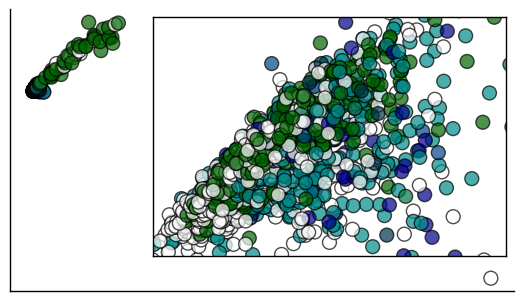

In [251]:
########## ZOOMED IN PLOT ########## 2d
# Import necessary functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main plot
plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot2, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100, alpha=0.7, edgecolor='black', linewidth=1)
plt.title('')
# plt.legend(loc='upper right', title='')
# Remove legend
plt.legend([], [], frameon=False)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Keep only 3 ticks on each axis
# plt.gca().set_xticks([0, 300])
# plt.gca().set_yticks([-150, 0, 50])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
# Remove labels
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

# Create an inset for zooming in on a specific area
axins = inset_axes(plt.gca(), width='70%', height='85%', loc='upper right')  # Adjust size and location
sns.scatterplot(data=df_pivot2, x='PCA1', y='PCA2', hue='combined_marker_status', palette=combined_palette, s=100, ax=axins, alpha=0.7, edgecolor='black', linewidth=1)
# Define the limits for the zoomed area
lims = [-2, 2]
# Set limits for the inset
axins.set_xlim(lims)  # Adjust these limits as needed
axins.set_ylim(lims)  # Adjust these limits as needed

# Optionally remove the legend from the inset plot
axins.legend([], [], frameon=False)
# Remove axis names, ticks, and labels
# axins.set_xticks([-2, 0, 2])
# axins.set_yticks([-2, 0, 2])
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlabel('')
axins.set_ylabel('')

# Move the legend outside the plot
# plt.legend(title='', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=fontsize, markerscale=2)
# plt.legend
# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Draw lines from the inset to the main plot
# mark_inset(plt.gca(), axins, loc1=1, loc2=3, fc="none", ec='black', lw=5)

# Show the plots
plt.show()

/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3224421210.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot['color'] = df_pivot['combined_marker_status'].apply(
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3224421210.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3224421210.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3224421210.py:69: UserWarning: This figure includes Axes that are not compatible 

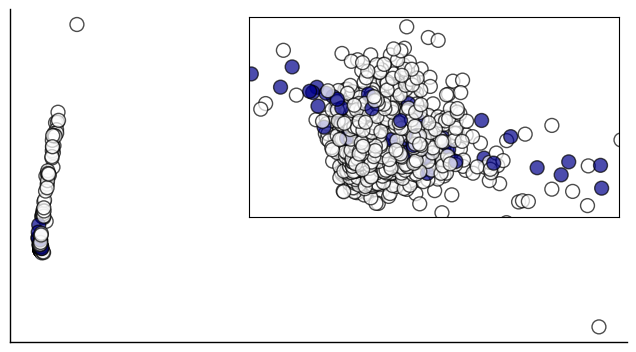

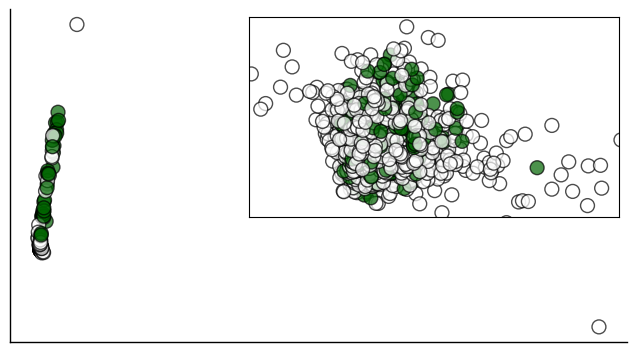

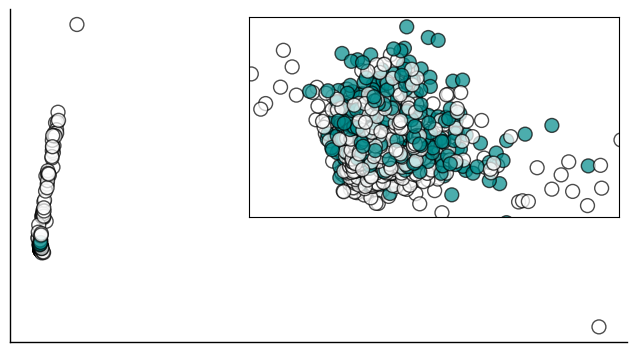

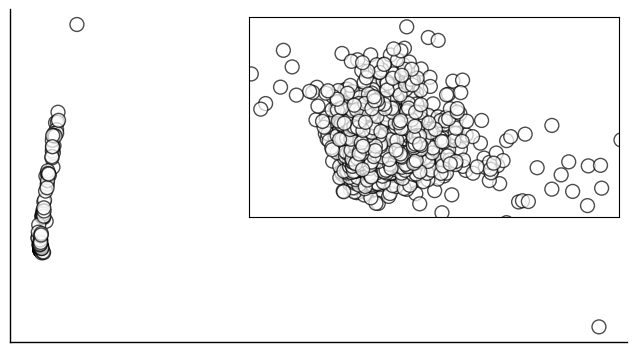

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 3D

plot_dict = {}  

# Define thickness and font size for consistency

# List of markers to plot individually
markers = ['SCA1', 'GATA1', 'PU1', 'CD41']  # Add other markers as needed
# markers = ['SCA1', 'GATA1', 'PU1']
# Set font size for all elements globally
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

# Create individual plots for each marker
for marker in markers:
    # Set up figure and main plot
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    df_pivot['color'] = df_pivot['combined_marker_status'].apply(
        lambda x: combined_palette[marker] if marker in x else 'white'
    )

    # Main scatter plot
    sns.scatterplot(
        data=df_pivot, x='PCA1', y='PCA2', ax=ax, color=df_pivot['color'],
        s=100, edgecolor='black', linewidth=1, alpha=0.7
    )

    # Customize main plot appearance
    # ax.set_title(f"{marker}")
    ax.legend([], [], frameon=False)  # Remove main plot legend
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)
    ax.xaxis.set_tick_params(width=thickness)
    ax.yaxis.set_tick_params(width=thickness)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    # ax.set_xticks([0, 800])
    # ax.set_yticks([-40, 0, 80])
    # ax.set_xlabel("PCA 1" if marker == markers[0] else '')
    # ax.set_ylabel("PCA 2" if marker == markers[0] else '')

    # Create inset plot
    axins = inset_axes(ax, width="60%", height="60%", loc='upper right')
    sns.scatterplot(
        data=df_pivot, x='PCA1', y='PCA2', color=df_pivot['color'], s=100, ax=axins, edgecolor='black', linewidth=1, alpha=0.7
    )
    
    # Inset appearance
    axins.set_xlim([-2, 2])  # Adjust limits as needed
    axins.set_ylim([-2, 2])  # Adjust limits as needed
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_xlabel('')
    axins.set_ylabel('')
    axins.legend([], [], frameon=False)  # Remove inset legend

    # Show plot
    plt.tight_layout()

    # Add the plot to a dict:
    plot_dict[marker] = fig

    # plt.show()

In [253]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # 2D

# plot_dict = {}  

# # Define thickness and font size for consistency
# thickness = linewidth
# font_size = 16

# # List of markers to plot individually
# # markers = ['SCA1', 'GATA1', 'PU1']  # Add other markers as needed
# markers = ['SCA1', 'GATA1', 'PU1', 'CD41']

# # Set font size for all elements globally
# plt.rc('font', size=font_size)
# plt.rc('axes', titlesize=font_size)
# plt.rc('axes', labelsize=font_size)
# plt.rc('legend', fontsize=font_size)
# plt.rc('figure', titlesize=font_size)

# # Create individual plots for each marker
# for marker in markers:
#     # Set up figure and main plot
#     fig, ax = plt.subplots(figsize=(fig_width, fig_height))
#     df_pivot2['color'] = df_pivot2['combined_marker_status'].apply(
#         lambda x: combined_palette[marker] if marker in x else 'white'
#     )

#     # Main scatter plot
#     sns.scatterplot(
#         data=df_pivot2, x='PCA1', y='PCA2', ax=ax, color=df_pivot2['color'],
#         s=100, edgecolor='black', linewidth=1, alpha=0.7
#     )

#     # Customize main plot appearance
#     # ax.set_title(f"{marker}")
#     ax.legend([], [], frameon=False)  # Remove main plot legend
#     ax.spines['top'].set_linewidth(0)
#     ax.spines['right'].set_linewidth(0)
#     ax.spines['bottom'].set_linewidth(thickness)
#     ax.spines['left'].set_linewidth(thickness)
#     ax.xaxis.set_tick_params(width=thickness)
#     ax.yaxis.set_tick_params(width=thickness)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     # ax.set_xticks([0, 800])
#     # ax.set_yticks([-40, 0, 80])
#     # ax.set_xlabel("PCA 1" if marker == markers[0] else '')
#     # ax.set_ylabel("PCA 2" if marker == markers[0] else '')

#     # Create inset plot
#     axins = inset_axes(ax, width="60%", height="60%", loc='upper right')
#     sns.scatterplot(
#         data=df_pivot2, x='PCA1', y='PCA2', color=df_pivot2['color'], s=100, ax=axins, edgecolor='black', linewidth=1, alpha=0.7
#     )
    
#     # Inset appearance
#     axins.set_xlim([-2, 2])  # Adjust limits as needed
#     axins.set_ylim([-2, 2])  # Adjust limits as needed
#     axins.set_xticks([])
#     axins.set_yticks([])
#     axins.set_xlabel('')
#     axins.set_ylabel('')
#     axins.legend([], [], frameon=False)  # Remove inset legend

#     # Show plot
#     plt.tight_layout()

#     # Add the plot to a dict:
#     plot_dict[marker] = fig

#     # plt.show()

/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/2022668714.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot['alpha'] = df_plot['combined_marker_status'].apply(


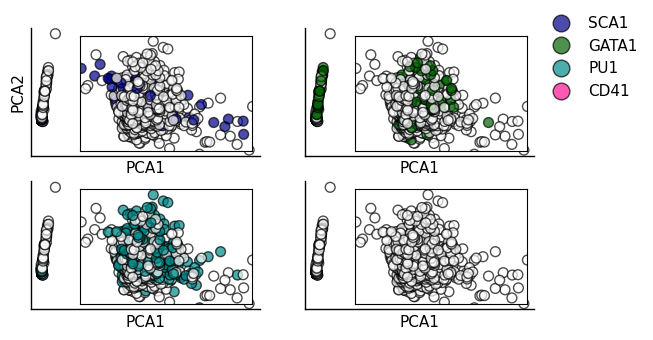

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df_plot = df_pivot

# List of markers to plot individually
# markers = ['SCA1', 'GATA1', 'PU1']
markers = ['SCA1', 'GATA1', 'PU1', 'CD41']

# Set font size for all elements globally
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height))
axes = axes.flatten()  # Flatten the 2D array to 1D

for ax, marker in zip(axes, markers):
    # Set up data coloring for the current marker
    df_plot['color'] = df_plot['combined_marker_status'].apply(
        lambda x: combined_palette[marker] if marker in x else 'white'
    )

    df_plot['alpha'] = df_plot['combined_marker_status'].apply(
        lambda x: 0.7 if marker in x else 0.7
    )

    # Main scatter plot
    sns.scatterplot(
        data=df_plot, x='PCA1', y='PCA2', ax=ax, color=df_plot['color'],
        s=50, edgecolor='black', linewidth=1, alpha=df_plot['alpha']
    )

    # Customize main plot appearance
    ax.set_title(f"")
    ax.legend([], [], frameon=False)  # Remove main plot legend
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)
    ax.xaxis.set_tick_params(width=thickness)
    ax.yaxis.set_tick_params(width=thickness)
    ax.set_xticks([])
    ax.set_yticks([])
    if marker != 'SCA1':
        ax.set_ylabel('')

    # ax.set_xlabel('')
    # ax.set_ylabel('')

    # Create inset plot
    axins = inset_axes(ax, width="75%", height="90%", loc='upper right')
    sns.scatterplot(
        data=df_plot, x='PCA1', y='PCA2', color=df_plot['color'], s=50,
        ax=axins, edgecolor='black', linewidth=1, alpha=df_plot['alpha']
    )
    
    # Customize inset appearance
    axins.set_xlim([-2, 2])  # Adjust limits as needed
    axins.set_ylim([-2, 2])  # Adjust limits as needed
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_xlabel('')
    axins.set_ylabel('')
    axins.legend([], [], frameon=False)  # Remove inset legend

# Set up a legend to the right of the plots
handles = [plt.Line2D([0], [0], marker='o', color='w', alpha=0.7, linewidth=15, markeredgecolor='black', label=marker, markersize=12, markerfacecolor=combined_palette[marker]) for marker in markers]

fig.legend(handles=handles, labels=markers, loc='upper right', fontsize=fontsize, title_fontsize=fontsize, frameon=False, bbox_to_anchor=(1.08, 0.95))

# Adjust layout and display
# plt.tight_layout()


plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/nocd_PCA_3d.svg')  # Saves as SVG format
plt.show()


In [255]:
df_plot.head()

marker  moments_central-2-2-3  moments_weighted_central-1-3-0  \
0                   -0.126410                        0.119457   
1                   -0.091266                        0.196253   
2                   -0.089535                       -0.086722   
3                   -0.080436                        0.127325   
4                   -0.062687                       -0.075238   

marker  moments_central-3-2-2  inertia_tensor-2-0  moments_weighted-2-3-1  \
0                    0.097371            6.759081                0.659389   
1                    0.103314            3.476396                0.236851   
2                   -0.043799            1.069936                0.241475   
3                   -0.012291            3.605883                0.418017   
4                    0.134825            4.073335                0.198548   

marker  intensity_min    extent  moments-0-3-2  \
0           -0.517228 -2.531541       0.217457   
1           -0.517228 -2.324534       0.022731   
2           -0.517228 -2.754518       0.083387   
3           -0.517228 -1.070874       0.063577   
4           -0.517228 -1.884083       0.022897   

marker  moments_weighted_normalized-3-2-3  moments_central-0-2-0  ...  \
0                               -0.149042               1.193035  ...   
1                               -0.168232               0.830780  ...   
2                                0.026376               1.058538  ...   
3                               -0.028644               0.943127  ...   
4                               -0.030274               0.604745  ...   

marker  moments_central-1-0-1  moments_weighted_central-0-1-0  GATA1  PU1  \
0                   -4.108269                       -9.187347      1    0   
1                   -1.451041                       -1.768593      1    0   
2                   -0.592133                       -1.914271      1    0   
3                   -2.200400                       -0.182143      1    0   
4                   -2.252962                       -4.232078      1    0   

marker  SCA1  combined_marker_status       PCA1       PCA2  color  alpha  
0          0                   GATA1  26.603875  56.413204  white    0.7  
1          0                   GATA1  10.730889  30.803468  white    0.7  
2          0                   GATA1  19.593947  39.452702  white    0.7  
3          0                   GATA1  22.847959  51.996799  white    0.7  
4          0                   GATA1  20.437791  42.320891  white    0.7  

[5 rows x 410 columns]

/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/2160841465.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


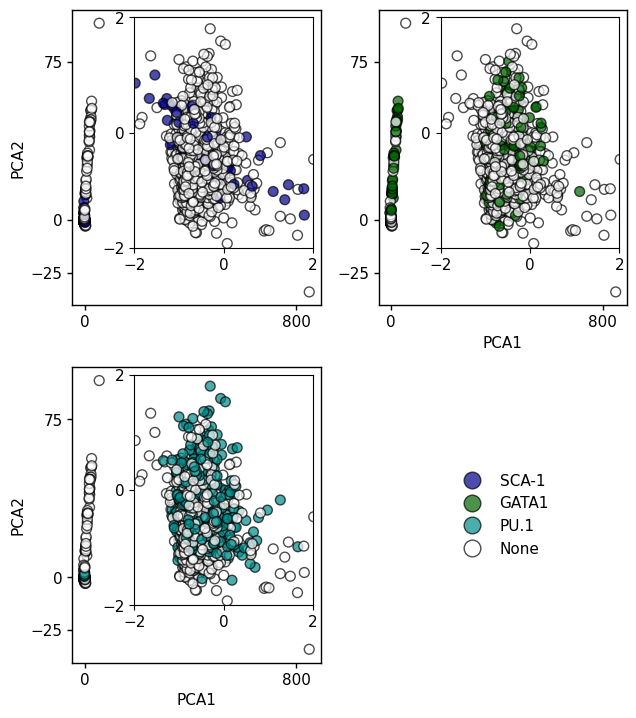

In [256]:
df_plot = df_pivot

# List of markers to plot individually
markers = ['SCA1', 'GATA1', 'PU1']

# Set font size for all elements globally
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height*2))
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, (ax, marker) in enumerate(zip(axes[:3], markers)):  # Use only the first 3 axes

    # Set up data coloring for the current marker
    df_plot['color'] = df_plot['combined_marker_status'].apply(
        lambda x: combined_palette[marker] if marker in x else 'white'
    )

    df_plot['alpha'] = df_plot['combined_marker_status'].apply(
        lambda x: 0.7 if marker in x else 0.7
    )

    # Main scatter plot
    sns.scatterplot(
        data=df_plot, x='PCA1', y='PCA2', ax=ax, 
        color=df_plot['color'],
        s=50, edgecolor='black', linewidth=1,
        alpha=df_plot['alpha']
    )

    # Customize main plot appearance
    # ax.set_title(f"{marker}")
    ax.legend([], [], frameon=False)  # Remove main plot legend
    ax.spines['top'].set_linewidth(thickness)
    ax.spines['right'].set_linewidth(thickness)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)
    ax.xaxis.set_tick_params(width=thickness)
    ax.yaxis.set_tick_params(width=thickness)

    ax.set_xticks([0,800])
    ax.set_yticks([-25,0,75])
    if marker == 'SCA1' or marker == 'PU1':
        ax.set_ylabel('PCA2')
    else:
        ax.set_ylabel('')
    
    if marker == 'PU1' or marker == 'GATA1':
        ax.set_xlabel('PCA1')
    else:
        ax.set_xlabel('')

    # if marker == 'GATA1':
    #     ax.set_yticks([])
    # if marker == 'SCA1':
    #     ax.set_xticks([])

    # Create inset plot
    axins = inset_axes(ax, width="72%", height="78%", loc='upper right')
    sns.scatterplot(
        data=df_plot, x='PCA1', y='PCA2',
        color=df_plot['color'], s=50,
        ax=axins, edgecolor='black', linewidth=1, alpha=df_plot['alpha']
    )
    
    # Customize inset appearance
    axins.set_xlim([-2, 2])  # Adjust limits as needed
    axins.set_ylim([-2, 2])  # Adjust limits as needed
    axins.set_xticks([-2,0,2])
    axins.set_yticks([-2,0,2])
    axins.set_xlabel('')
    axins.set_ylabel('')
    axins.legend([], [], frameon=False)  # Remove inset legend


markers = ['SCA1', 'GATA1', 'PU1', 'None']
# Set up the legend in the fourth plot area (axes[3])
handles = [
    plt.Line2D([0], [0], marker='o', color='w', alpha=0.7, linewidth=15, 
               markeredgecolor='black', label=marker, markersize=12, 
               markerfacecolor=combined_palette[marker]) 
    for marker in markers
]
axes[3].legend(handles=handles, labels=["SCA-1", "GATA1", "PU.1", "None"], loc='center', fontsize=font_size, frameon=False)
axes[3].axis('off')  # Turn off axis display for the legend area

# Save and show plot
plt.tight_layout()
plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/nocd_PCA_3d.svg')
plt.show()

/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3235016422.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot2['color'] = df_pivot2['combined_marker_status'].apply(
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3235016422.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot2['alpha'] = df_pivot2['combined_marker_status'].apply(
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/3235016422.py:98: UserWarning: This figure includes Axes that are not compatible with 

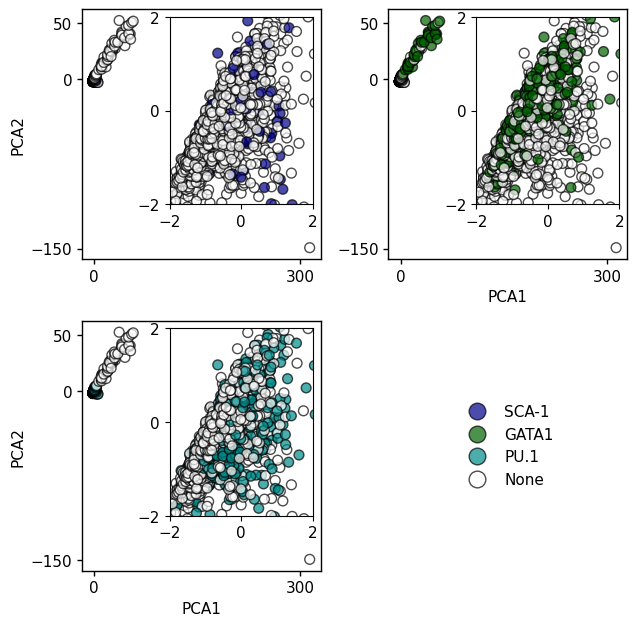

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# List of markers to plot individually
# markers = ['SCA1', 'GATA1', 'PU1']
markers = ['SCA1', 'GATA1', 'PU1', 'None']

# Set font size for all elements globally
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height*1.75))
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, (ax, marker) in enumerate(zip(axes[:3], markers)):  # Use only the first 3 axes
    # Set up data coloring for the current marker
    df_pivot2['color'] = df_pivot2['combined_marker_status'].apply(
        lambda x: combined_palette[marker] if marker in x else 'white'
    )
    df_pivot2['alpha'] = df_pivot2['combined_marker_status'].apply(
        lambda x: 0.7 if marker in x else 0.7
    )

    # Main scatter plot
    sns.scatterplot(
        data=df_pivot2, x='PCA1', y='PCA2', ax=ax, color=df_pivot2['color'],
        s=50, edgecolor='black', linewidth=1, alpha=df_pivot2['alpha']
    )

    # Only keep labels for axes on certain plots
    if marker == 'SCA1' or marker == 'PU1':
        ax.set_ylabel('PCA2')
    else:
        ax.set_ylabel('')

    if marker == 'PU1' or marker == "GATA1":
        ax.set_xlabel('PCA1')
    else:
        ax.set_xlabel('')

    # Customize main plot appearance
    ax.set_title(f"")
    ax.legend([], [], frameon=False)  # Remove main plot legend
    ax.spines['top'].set_linewidth(thickness)
    ax.spines['right'].set_linewidth(thickness)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)
    ax.xaxis.set_tick_params(width=thickness)
    ax.yaxis.set_tick_params(width=thickness)
    ax.set_xticks([0,300])
    ax.set_yticks([-150,0,50])
    # ax.set_xlabel('')
    # ax.set_ylabel('')

    # if marker == 'GATA1':
        # ax.set_yticks([])
    # if marker == 'SCA1':
        # ax.set_xticks([])

    # Create inset plot
    axins = inset_axes(ax, width="60%", height="75%", loc='upper right')
    sns.scatterplot(
        data=df_pivot2, x='PCA1', y='PCA2', color=df_pivot2['color'], s=50,
        ax=axins, edgecolor='black', linewidth=1, alpha=0.7
    )
    
    # Customize inset appearance
    axins.set_xlim([-2, 2])  # Adjust limits as needed
    axins.set_ylim([-2, 2])  # Adjust limits as needed
    axins.set_xticks([-2,0,2])
    axins.set_yticks([-2,0,2])
    axins.set_xlabel('')
    axins.set_ylabel('')
    axins.legend([], [], frameon=False)  # Remove inset legend

# handles = [plt.Line2D([0], [0], marker='o', color='w', alpha=0.7, linewidth=15, markeredgecolor='black', label=marker, markersize=20, markerfacecolor=combined_palette[marker]) for marker in markers]

# fig.legend(handles=handles, labels=markers, loc='upper right', fontsize=fontsize, title_fontsize=fontsize, frameon=False, bbox_to_anchor=(1.1, 0.95))

markers = ['SCA1', 'GATA1', 'PU1', 'None']
# Set up the legend in the fourth plot area (axes[3])
handles = [
    plt.Line2D([0], [0], marker='o', color='w', alpha=0.7, linewidth=15, 
               markeredgecolor='black', label=marker, markersize=12, 
               markerfacecolor=combined_palette[marker]) 
    for marker in markers
]
axes[3].legend(handles=handles, labels=["SCA-1", "GATA1", "PU.1", "None"], loc='center', fontsize=font_size, frameon=False)
axes[3].axis('off')  # Turn off axis display for the legend area

# Adjust layout and display
plt.tight_layout()
plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/nocd_PCA_2d.svg')
plt.show()

In [258]:
# TSNE

from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2)#, random_state=0)
tsne2 = TSNE(n_components=2)#, random_state=0)
tsne3 = TSNE(n_components=2)#, random_state=0)
tsne4 = TSNE(n_components=2)#, random_state=0)
tsne_results = tsne.fit_transform(features)
tsne_results2 = tsne2.fit_transform(features2)
tsne_results3 = tsne3.fit_transform(features3)
tsne_results4 = tsne4.fit_transform(features4)

# Add t-SNE results to the DataFrame
df_pivot['TSNE1'] = tsne_results[:, 0]
df_pivot['TSNE2'] = tsne_results[:, 1]
df_pivot2['TSNE1'] = tsne_results2[:, 0]
df_pivot2['TSNE2'] = tsne_results2[:, 1]
df_pivot3['TSNE1'] = tsne_results3[:, 0]
df_pivot4['TSNE1'] = tsne_results4[:, 0]
df_pivot3['TSNE2'] = tsne_results3[:, 1]
df_pivot4['TSNE2'] = tsne_results4[:, 1]


/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/120916851.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot['TSNE1'] = tsne_results[:, 0]
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/120916851.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot['TSNE2'] = tsne_results[:, 1]
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_2169/120916851.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

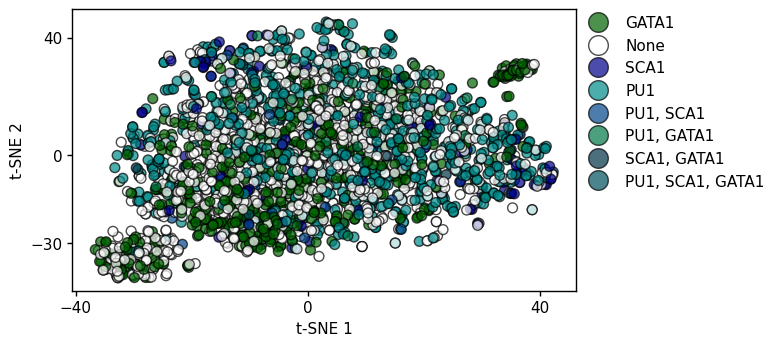

In [259]:
from matplotlib.colors import to_rgb, to_hex
import itertools

plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot, x='TSNE1', y='TSNE2', hue='combined_marker_status', palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1)

# Move the legend outside the plot
plt.legend(title='', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=fontsize, markerscale=2)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(thickness)
plt.gca().spines['right'].set_linewidth(thickness)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Only keep 3 ticks on each axis
plt.gca().set_xticks([-40, 0, 40])
plt.gca().set_yticks([-30, 0, 40])

# Set labels for the axes
plt.xlabel('t-SNE 1', fontsize=fontsize)
plt.ylabel('t-SNE 2', fontsize=fontsize)

plt.show()

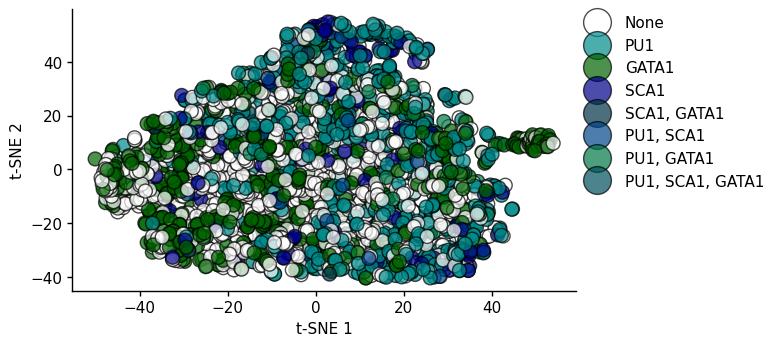

In [260]:
from matplotlib.colors import to_rgb, to_hex
import itertools

plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot2, x='TSNE1', y='TSNE2', hue='combined_marker_status', palette=combined_palette, s=100, alpha=0.7, edgecolor='black', linewidth=1)

# Move the legend outside the plot
plt.legend(title='', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=fontsize, markerscale=2)

# Set font size for all elements to be 16
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# Make the axis lines thicker
thickness = linewidth
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(thickness)
plt.gca().spines['left'].set_linewidth(thickness)
# Set ticks to be thicker
plt.gca().xaxis.set_tick_params(width=thickness)
plt.gca().yaxis.set_tick_params(width=thickness)

# Only keep 3 ticks on each axis
# plt.gca().set_xticks([-40, 0, 40])
# plt.gca().set_yticks([-30, 0, 40])

# Set labels for the axes
plt.xlabel('t-SNE 1', fontsize=fontsize)
plt.ylabel('t-SNE 2', fontsize=fontsize)

plt.show()

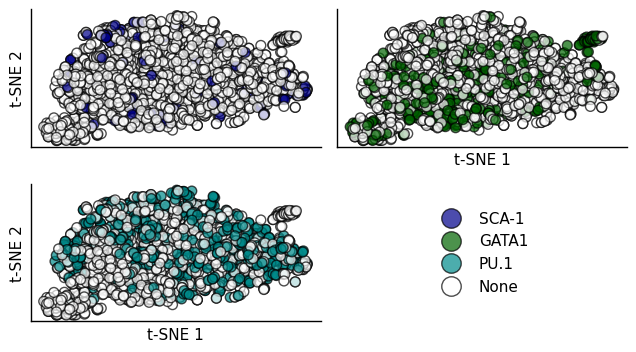

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

markers = ['SCA1', 'GATA1', 'PU1', 'CD41']

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height))
axes = axes.flatten()  # Flatten the 2D array to 1D

plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)

for i, (ax, marker) in enumerate(zip(axes[:3], markers)):  # Use only the first 3 axes
    # Filter data for the current marker
    plot_subset = df_pivot[df_pivot['combined_marker_status'].str.contains(marker)]
    
    # Create a color mask, white for other markers
    df_pivot['color'] = df_pivot['combined_marker_status'].apply(
        lambda x: palette[marker] if marker in x else 'white'
    )

    df_pivot['alpha'] = df_pivot['combined_marker_status'].apply(
        lambda x: 0.7 if marker in x else 0.7
    )
    
    # Scatter plot for the current marker
    sns.scatterplot(data=df_pivot, x='TSNE1', y='TSNE2', ax=ax, 
                    color=df_pivot['color'], s=50, edgecolor='black', linewidth=1, alpha=df_pivot['alpha'])
    
    # Set axis labels
    ax.set_xlabel('t-SNE 1' if marker == 'PU1' or marker == 'GATA1' else '')
    ax.set_ylabel('t-SNE 2' if marker == 'SCA1' or marker == 'PU1' else '')
    
    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Make the axis lines thicker
    thickness = linewidth
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)

# Set up legend in the fourth subplot (axes[3])
axes[3].axis("off")  # Hide the plot area for the legend

# Legend labels and colors
legend_labels = ['SCA1', 'GATA1', 'PU1', 'None']  # Labels for legend

legend_colors = [combined_palette[label] for label in legend_labels]  # Get colors for each label

# Create a legend with the labels and colors
legend = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=7, 
               alpha=0.7, markeredgecolor='black', linewidth=1, markerfacecolor=color)
    for label, color in zip(legend_labels, legend_colors)
]
axes[3].legend(handles=legend, labels=["SCA-1", "GATA1", "PU.1", "None"], loc='center', frameon=False, fontsize=font_size, markerscale=2)
plt.tight_layout()

# Save and show the plot
plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/nocd_TSNE_3d.svg')
plt.show()


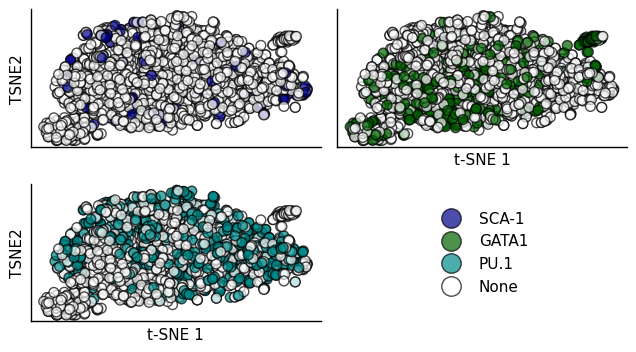

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)

# Marker list for plotting
markers = ['SCA1', 'GATA1', 'PU1', 'CD41']
thickness = linewidth  # Line thickness for axis

# Create subplots with 2 rows and 2 columns (total 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height))  # Adjusted size for better layout

# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, marker in zip(axes[:-1], markers):  # Leave the last subplot empty for the legend
    # Filter data for the current marker
    plot_subset = df_pivot[df_pivot['combined_marker_status'].str.contains(marker)]
    
    # Assign color for current marker, white for others
    df_pivot['color'] = df_pivot['combined_marker_status'].apply(
        lambda x: palette[marker] if marker in x else 'white'
    )

    df_pivot['alpha'] = df_pivot['combined_marker_status'].apply(
        lambda x: 0.7 if marker in x else 0.7
    )
    
    # Scatter plot for the current marker
    sns.scatterplot(data=df_pivot, x='TSNE1', y='TSNE2', ax=ax, 
                    color=df_pivot['color'], s=50, edgecolor='black', linewidth=1, alpha=df_pivot['alpha'])
    
    # Set axis labels for the first subplot only
    ax.set_xlabel('t-SNE 1')
    if marker == 'SCA1':
        ax.set_xlabel('')
    if marker == 'GATA1':
        ax.set_ylabel('')
    # ax.set_ylabel('t-SNE 2' if (marker == 'SCA1' | marker == 'PU1') else '')

    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Customize axis line thickness
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)

# Create a legend in the last subplot

legend = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=7, alpha=0.7,
               markeredgecolor='black', linewidth=1, markerfacecolor=color)
    for label, color in zip(legend_labels, legend_colors)
]
axes[-1].legend(handles=legend, labels=["SCA-1", "GATA1", "PU.1", "None"], loc='center', frameon=False, fontsize=font_size, markerscale=2)
axes[-1].axis('off')  # Hide the empty axis for the legend

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/nocd_TSNE_2d.svg')
plt.show()


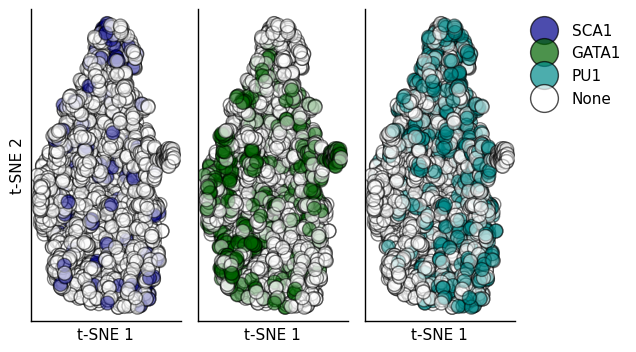

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)

# Marker list for plotting
markers = ['SCA1', 'GATA1', 'PU1', 'CD41']
thickness = linewidth  # Line thickness for axis

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_height))

for ax, marker in zip(axes, markers):
    # Filter data for the current marker
    plot_subset = df_pivot2[df_pivot2['combined_marker_status'].str.contains(marker)]
    
    # Assign color for current marker, white for others
    df_pivot2['color'] = df_pivot2['combined_marker_status'].apply(
        lambda x: palette[marker] if marker in x else 'white'
    )
    
    # Scatter plot for the current marker
    sns.scatterplot(data=df_pivot2, x='TSNE1', y='TSNE2', ax=ax, 
                    color=df_pivot2['color'], s=100, edgecolor='black', linewidth=1, alpha=0.5)
    
    # Set axis labels for the first subplot only
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2' if marker == 'SCA1' else '')

    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Customize axis line thickness
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)

# Create a legend
legend = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, alpha=0.7,
               markeredgecolor='black', linewidth=1, markerfacecolor=color)
    for label, color in zip(legend_labels, legend_colors)
]
plt.legend(handles=legend, bbox_to_anchor=(1, 1), loc='upper left', frameon=False, fontsize=font_size, markerscale=2)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


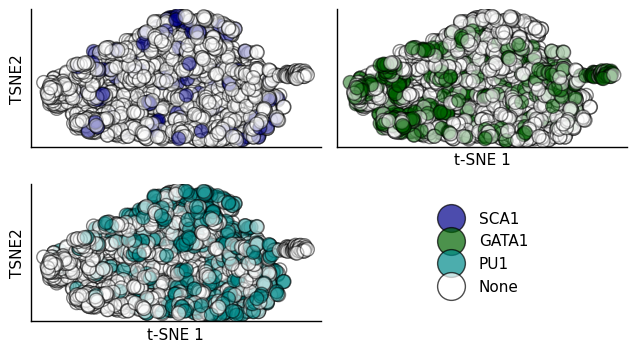

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)

# Marker list for plotting
markers = ['SCA1', 'GATA1', 'PU1', 'CD41']
thickness = linewidth  # Line thickness for axis

# Create subplots with 2 rows and 2 columns (total 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height))  # Adjusted size for better layout

# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, marker in zip(axes[:-1], markers):  # Leave the last subplot empty for the legend
    # Filter data for the current marker
    plot_subset = df_pivot2[df_pivot2['combined_marker_status'].str.contains(marker)]
    
    # Assign color for current marker, white for others
    df_pivot2['color'] = df_pivot2['combined_marker_status'].apply(
        lambda x: palette[marker] if marker in x else 'white'
    )
    
    # Scatter plot for the current marker
    sns.scatterplot(data=df_pivot2, x='TSNE1', y='TSNE2', ax=ax, 
                    color=df_pivot2['color'], s=100, edgecolor='black', linewidth=1, alpha=0.5)
    
    # Set axis labels for the first subplot only
    ax.set_xlabel('t-SNE 1')
    if marker == 'SCA1':
        ax.set_xlabel('')
    if marker == 'GATA1':
        ax.set_ylabel('')
    # ax.set_ylabel('t-SNE 2' if (marker == 'SCA1' | marker == 'PU1') else '')

    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Customize axis line thickness
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(thickness)
    ax.spines['left'].set_linewidth(thickness)

# Create a legend in the last subplot
legend = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, alpha=0.7,
               markeredgecolor='black', linewidth=1, markerfacecolor=color)
    for label, color in zip(legend_labels, legend_colors)
]
axes[-1].legend(handles=legend, loc='center', frameon=False, fontsize=font_size, markerscale=2)
axes[-1].axis('off')  # Hide the empty axis for the legend

# Adjust layout and show plot
plt.tight_layout()
plt.show()


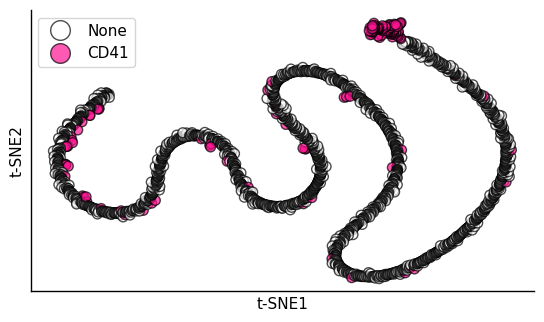

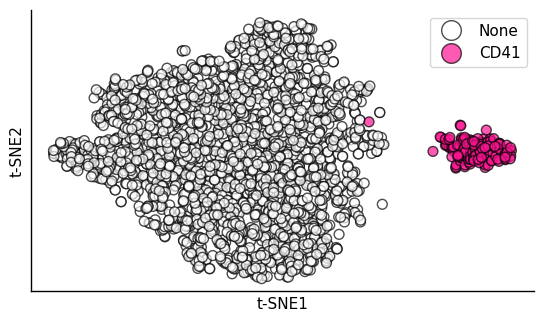

In [265]:
from matplotlib.colors import to_rgb, to_hex
import matplotlib.pyplot as plt
import seaborn as sns

# Thickness for axis lines
thickness = linewidth

# Plot settings
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('figure', titlesize=fontsize)

# 3D t-SNE Plot
plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot3, x='TSNE1', y='TSNE2', hue='combined_marker_status', 
                palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1)

# Customize plot appearance
plt.legend(frameon=True, markerscale=2)  # Hide legend
ax = plt.gca()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(thickness)
ax.spines['left'].set_linewidth(thickness)
ax.xaxis.set_tick_params(width=thickness)
ax.yaxis.set_tick_params(width=thickness)
plt.xlabel('t-SNE1')  # Remove x-axis label
plt.ylabel('t-SNE2')  # Remove y-axis label
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/cd_TSNE_3d.svg')  # Saves as SVG format

plt.show()

# 2D t-SNE Plot
plt.figure(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_pivot4, x='TSNE1', y='TSNE2', hue='combined_marker_status', 
                palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1)

# Customize plot appearance
plt.legend(frameon=True, markerscale=2)  # Hide legend
ax = plt.gca()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(thickness)
ax.spines['left'].set_linewidth(thickness)
ax.xaxis.set_tick_params(width=thickness)
ax.yaxis.set_tick_params(width=thickness)
plt.xlabel('t-SNE1')  # Remove x-axis label
plt.ylabel('t-SNE2')  # Remove y-axis label
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.savefig('/Users/agreic/Desktop/testing_dir/picsforupload/cd_TSNE_2d.svg')  # Saves as SVG format

plt.show()


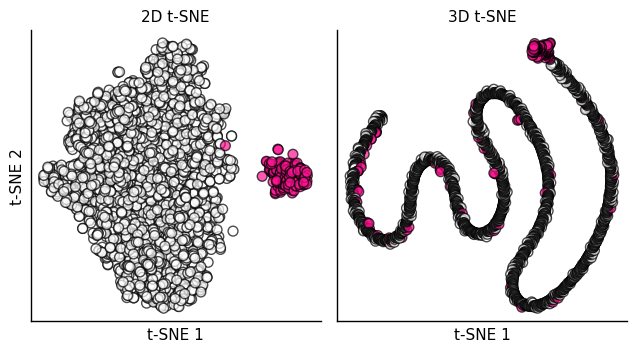

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb, to_hex

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(fig_width, fig_height))

# Thickness for the axis lines
thickness = linewidth

# 2D Plot
sns.scatterplot(data=df_pivot4, x='TSNE1', y='TSNE2', hue='combined_marker_status', 
                palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1, ax=axes[0])

# Customize 3D plot appearance
axes[0].legend([], [], frameon=False)  # Hide legend
axes[0].spines['top'].set_linewidth(0)
axes[0].spines['right'].set_linewidth(0)
axes[0].spines['bottom'].set_linewidth(thickness)
axes[0].spines['left'].set_linewidth(thickness)
axes[0].xaxis.set_tick_params(width=thickness)
axes[0].yaxis.set_tick_params(width=thickness)
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('2D t-SNE')


# 3D Plot
sns.scatterplot(data=df_pivot3, x='TSNE1', y='TSNE2', hue='combined_marker_status', 
                palette=combined_palette, s=50, alpha=0.7, edgecolor='black', linewidth=1, ax=axes[1])

# Customize 2D plot appearance
axes[1].legend([], [], frameon=False)  # Hide legend
axes[1].spines['top'].set_linewidth(0)
axes[1].spines['right'].set_linewidth(0)
axes[1].spines['bottom'].set_linewidth(thickness)
axes[1].spines['left'].set_linewidth(thickness)
axes[1].xaxis.set_tick_params(width=thickness)
axes[1].yaxis.set_tick_params(width=thickness)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('3D t-SNE')

# Adjust layout
plt.tight_layout()
plt.show()
